#### For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])

In [ ]:
df.set_index('date')

In [31]:
df.head(2)

,date,value
10,2016-05-19,19736
17,2016-05-26,18060


In [24]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

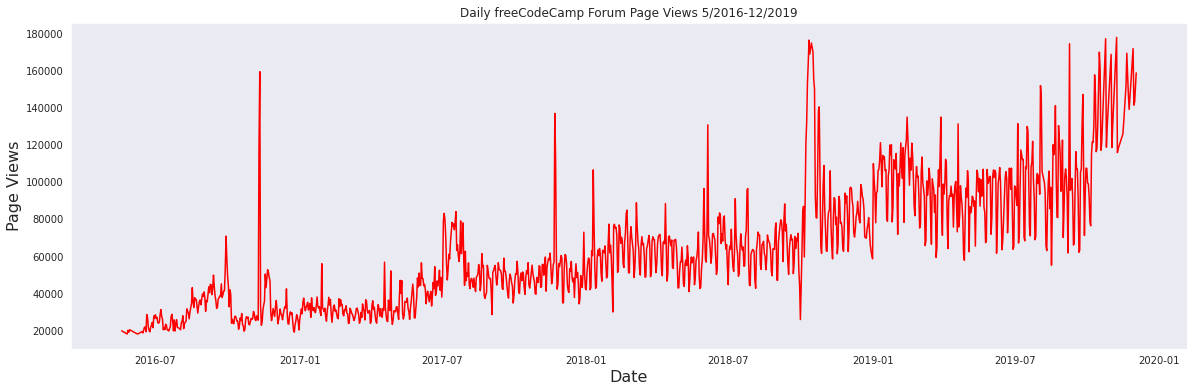

In [49]:
'''Create a draw_line_plot function that uses Matplotlib to draw a line". 
The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019.
 The label on the x axis should be Date and the label on the y axis should be Page Views.'''
fig, ax = plt.subplots(figsize = (20,6))

ax.plot(df['date'], df['value'], color = 'red')
ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date', size = 16)
ax.set_ylabel('Page Views', size = 16)
plt.show()

#### Create a draw_bar_plot function that draws a bar chart. It should show average daily page views for each month grouped by year.The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [138]:
# First thing we need to do is Copy and modify data for monthly
df_bar = df.copy()

In [141]:
df_bar.dtypes

date     object
value     int64
dtype: object

In [140]:
# changing the month information from numbers to names
import calendar
df_bar['date'] = df['date'].dt.month
df_bar.sort_values(by='date', inplace=True)
df_bar['date'] = df_bar['date'].apply(lambda x: calendar.month_abbr[x])

In [142]:
# Creating an year column
df_bar['year'] = df['date'].dt.year

In [ ]:
# Renaming columns
df_bar.columns = ['month','count','year']

In [144]:
df_bar.head()

,month,count,year
242,Jan,37353,2017
972,Jan,94108,2019
971,Jan,77897,2019
970,Jan,94514,2019
969,Jan,100710,2019


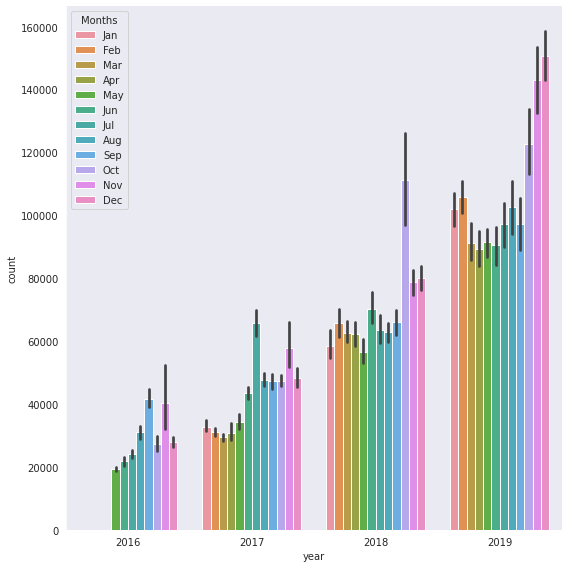

In [148]:
# Ploting chart
 
sns.catplot(data = df_bar, x = 'year', y = 'count', kind = 'bar', hue='month', height = 8, legend = False)
plt.legend(title = "Months", loc='upper left')

#### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

(0.0, 200000.0)

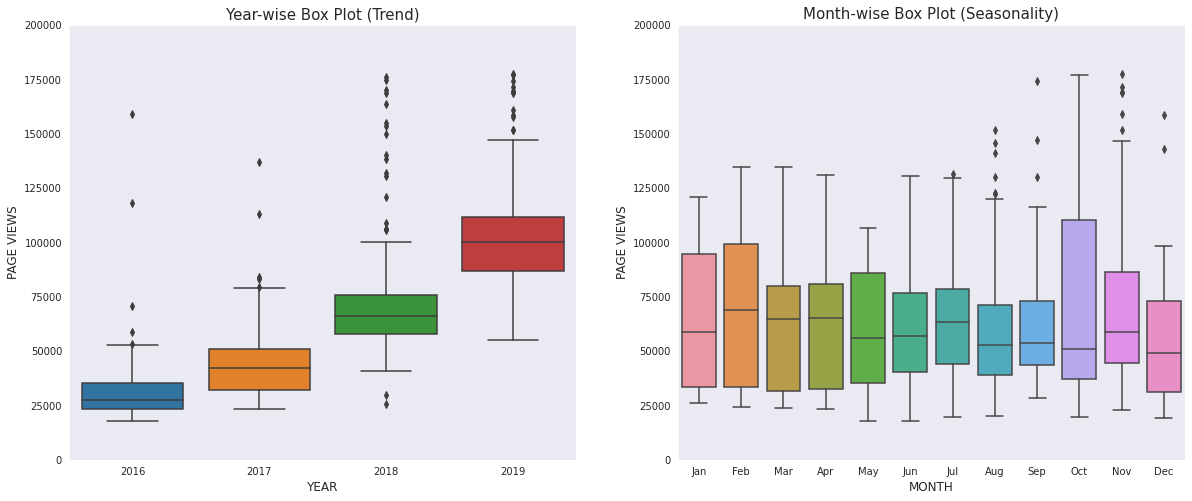

In [181]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data = df_bar, x='year', y='count')
plt.title('Year-wise Box Plot (Trend)', size = 15)
plt.xlabel('YEAR', size=12)
plt.ylabel('PAGE VIEWS',size=12)
plt.ylim(0,200000)

plt.subplot(1,2,2)
sns.boxplot(data = df_bar, x='month', y='count')
plt.title('Month-wise Box Plot (Seasonality)', size = 15)
plt.xlabel('MONTH', size=12)
plt.ylabel('PAGE VIEWS',size=12)
plt.ylim(0,200000)